In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from produce.main import plot_stocks
from produce.main import pca_plot
import numpy as np







In [2]:
df = pd.read_csv('produce/all_intraday.csv').drop(columns=['Unnamed: 0'])[:-1]

In [3]:
symbols = list(df.columns)
symbols

['Apple',
 'IBM',
 'Microsoft',
 'Google',
 'Amazon',
 'Tesla',
 'Nvidia',
 'Walmart',
 'Johnson & Johnson',
 'Verizon',
 'AT&T',
 'Pfizer']

In [4]:
# df['rolling_mean'] = df['Apple'].rolling(window=5).mean()



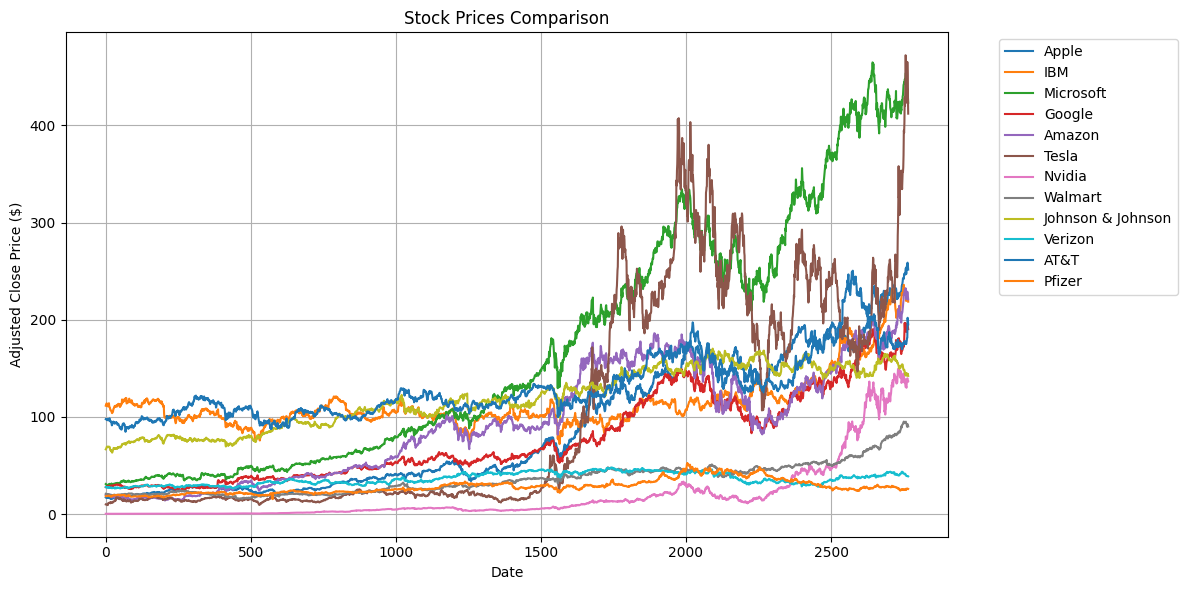

In [5]:
plot_stocks(df, title="Stock Prices Comparison")

In [6]:
df

,Apple,IBM,Microsoft,Google,Amazon,Tesla,Nvidia,Walmart,Johnson & Johnson,Verizon,AT&T,Pfizer
0,17.2111,111.6222,31.0098,27.7829,19.8985,10.0093,0.3740,20.9553,66.6831,27.8842,97.7239,18.4821
1,16.8258,112.5157,30.7929,27.5777,19.8000,9.9327,0.3695,20.8730,67.2838,27.5378,97.6267,18.5307
2,16.9496,111.7696,30.2006,27.8845,19.6750,9.7740,0.3759,20.7694,67.6354,27.7138,97.3513,18.5307
3,16.7635,114.0861,29.9837,28.4105,19.9000,9.9227,0.3806,20.8358,69.0419,27.9353,97.5862,18.6588
4,16.9154,113.1174,29.8669,28.4929,20.0960,10.1000,0.3858,20.7083,68.9320,27.8732,97.0920,18.7613
...,...,...,...,...,...,...,...,...,...,...,...,...
2762,254.6703,220.3140,432.8367,194.3834,224.8300,433.1550,138.9980,89.9841,144.1468,39.2566,181.1200,26.3261
2763,257.8768,222.9166,438.1760,195.7640,228.8700,465.2100,139.7279,92.4274,144.6924,39.0994,181.4300,26.3064
2764,258.7344,223.3834,436.5888,195.2446,226.8650,452.2999,139.5779,92.5371,143.8491,39.2664,202.0100,26.1097
2765,254.5305,221.0314,429.6929,192.3680,223.8000,431.6600,136.5882,91.4002,144.0971,39.1878,199.0000,26.1391


In [7]:
df_rolling = pd.DataFrame()
for col in df.columns:
    df_rolling[col] = df[col] - df[col].shift(1)
df_rolling = df_rolling.dropna()


In [8]:
df.shape

(2767, 12)

In [9]:

df_rolling = df_rolling.dropna()
df_rolling


,Apple,IBM,Microsoft,Google,Amazon,Tesla,Nvidia,Walmart,Johnson & Johnson,Verizon,AT&T,Pfizer
1,-0.3853,0.8935,-0.2169,-0.2052,-0.0985,-0.0766,-0.0045,-0.0823,0.6007,-0.3464,-0.0972,0.0486
2,0.1238,-0.7461,-0.5923,0.3068,-0.1250,-0.1587,0.0064,-0.1036,0.3516,0.1760,-0.2754,0.0000
3,-0.1861,2.3165,-0.2169,0.5260,0.2250,0.1487,0.0047,0.0664,1.4065,0.2215,0.2349,0.1281
4,0.1519,-0.9687,-0.1168,0.0824,0.1960,0.1773,0.0052,-0.1275,-0.1099,-0.0621,-0.4942,0.1025
5,-0.2256,-0.0963,-0.1836,-0.3169,-0.0360,-0.2433,-0.0142,-0.1593,0.5348,-0.5109,0.3970,0.0122
...,...,...,...,...,...,...,...,...,...,...,...,...
2762,-0.3996,-1.9966,-3.6427,1.8755,-1.2300,9.7950,3.7597,-2.0145,0.4465,-0.0393,2.9500,0.3984
2763,3.2065,2.6026,5.3393,1.3806,4.0400,32.0550,0.7299,2.4433,0.5456,-0.1572,0.3100,-0.0197
2764,0.8576,0.4668,-1.5872,-0.5194,-2.0050,-12.9101,-0.1500,0.1097,-0.8433,0.1670,20.5800,-0.1967
2765,-4.2039,-2.3520,-6.8959,-2.8766,-3.0650,-20.6399,-2.9897,-1.1369,0.2480,-0.0786,-3.0100,0.0294


In [10]:
df_rolling.shape

(2766, 12)

In [11]:
df_rolling = df_rolling.T

In [12]:
row, col = df_rolling.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = df_rolling.iloc[i,:]
    print(movements[i])

[-0.3853  0.1238 -0.1861 ...  0.8576 -4.2039 -2.9368]
[ 0.8935 -0.7461  2.3165 ...  0.4668 -2.352  -2.426 ]
[-0.2169 -0.5923 -0.2169 ... -1.5872 -6.8959 -6.4271]
[-0.2052  0.3068  0.526  ... -0.5194 -2.8766 -2.0575]
[-0.0985 -0.125   0.225  ... -2.005  -3.065  -2.88  ]
[ -0.0766  -0.1587   0.1487 ... -12.9101 -20.6399 -19.63  ]
[-0.0045  0.0064  0.0047 ... -0.15   -2.9897 -0.08  ]
[-0.0823 -0.1036  0.0664 ...  0.1097 -1.1369 -1.1369]
[ 0.6007  0.3516  1.4065 ... -0.8433  0.248  -1.9047]
[-0.3464  0.176   0.2215 ...  0.167  -0.0786 -0.2849]
[-0.0972 -0.2754  0.2349 ... 20.58   -3.01   -3.7   ]
[ 0.0486  0.      0.1281 ... -0.1967  0.0294 -0.1672]


In [13]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2361077067287053
-0.23429462327315723
0.0005479454353742008


In [14]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [15]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suppress joblib warning about physical cores
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set to the number of cores you want to use

In [16]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [17]:
print(kmeans.inertia_)

0.7689173240906366


In [18]:
# predict cluster labels
labels = pipeline.predict(movements)

In [19]:
pd.DataFrame({'labels': labels})


,labels
0,9
1,6
2,9
3,9
4,1
5,7
6,5
7,4
8,2
9,8


In [20]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df_new = pd.DataFrame({'companies': symbols, 'labels': labels})

# display df sorted by cluster labels
print(df_new.sort_values('labels'))

            companies  labels
11             Pfizer       0
4              Amazon       1
8   Johnson & Johnson       2
10               AT&T       3
7             Walmart       4
6              Nvidia       5
1                 IBM       6
5               Tesla       7
9             Verizon       8
2           Microsoft       9
3              Google       9
0               Apple       9


In [21]:
for i in range(0, len(symbols)):
 print('Company: {}, Change: {}'.format(symbols[i], sum(movements[i][:])))

Company: Apple, Change: 234.38260000000002
Company: IBM, Change: 106.9832
Company: Microsoft, Change: 392.25600000000003
Company: Google, Change: 162.52759999999998
Company: Amazon, Change: 201.0215
Company: Tesla, Change: 402.0207
Company: Nvidia, Change: 136.1342
Company: Walmart, Change: 69.308
Company: Johnson & Johnson, Change: 75.5093
Company: Verizon, Change: 11.018700000000003
Company: AT&T, Change: 97.57610000000003
Company: Pfizer, Change: 7.489800000000006


<Figure size 640x480 with 0 Axes>

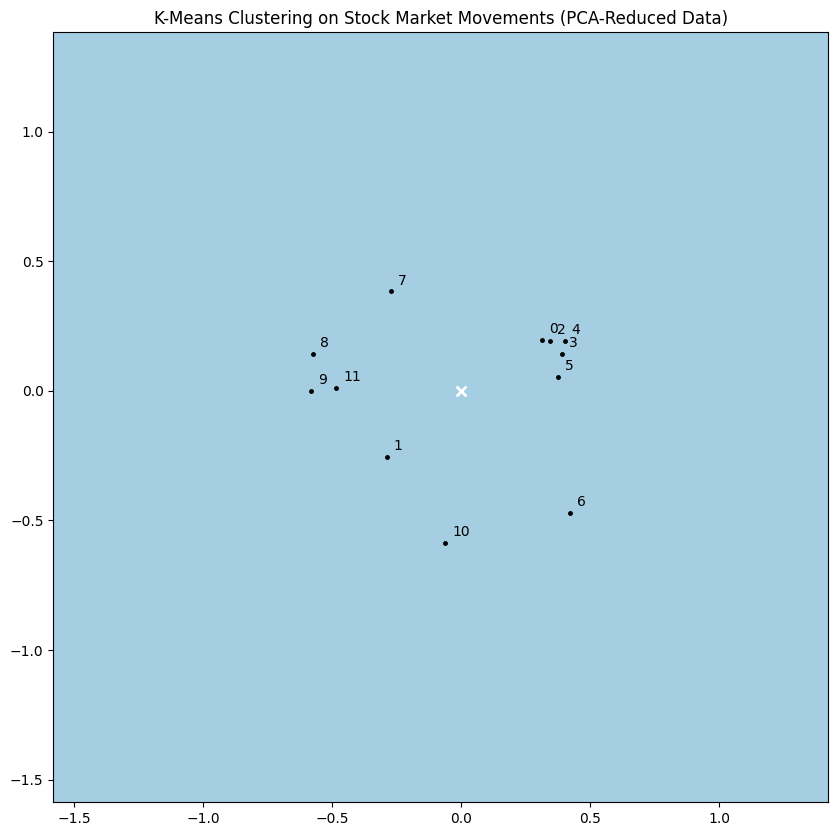

<Figure size 640x480 with 0 Axes>

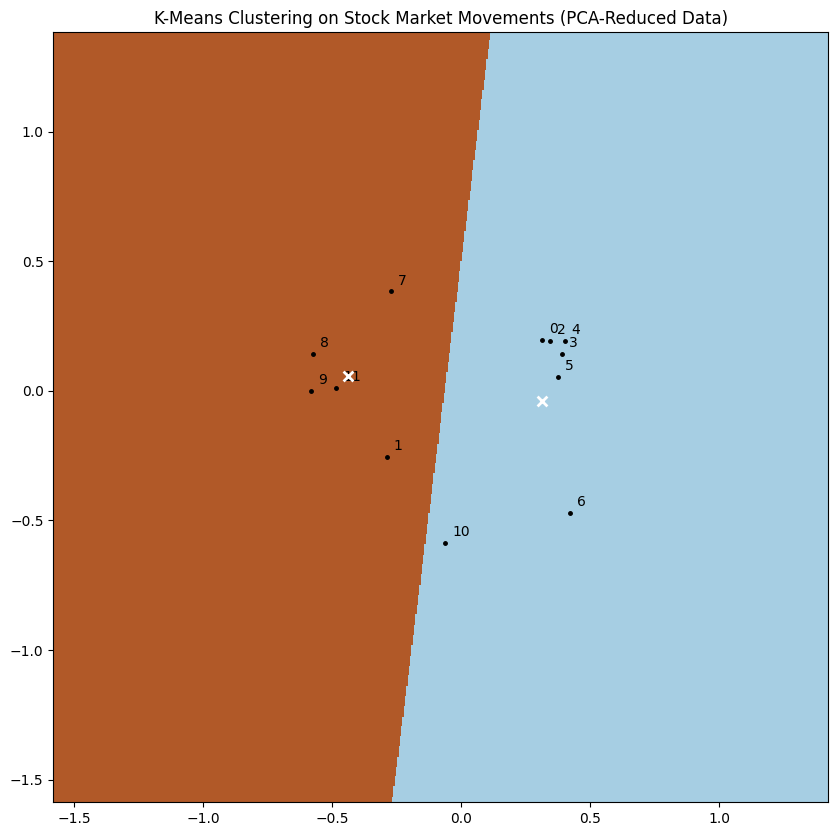

<Figure size 640x480 with 0 Axes>

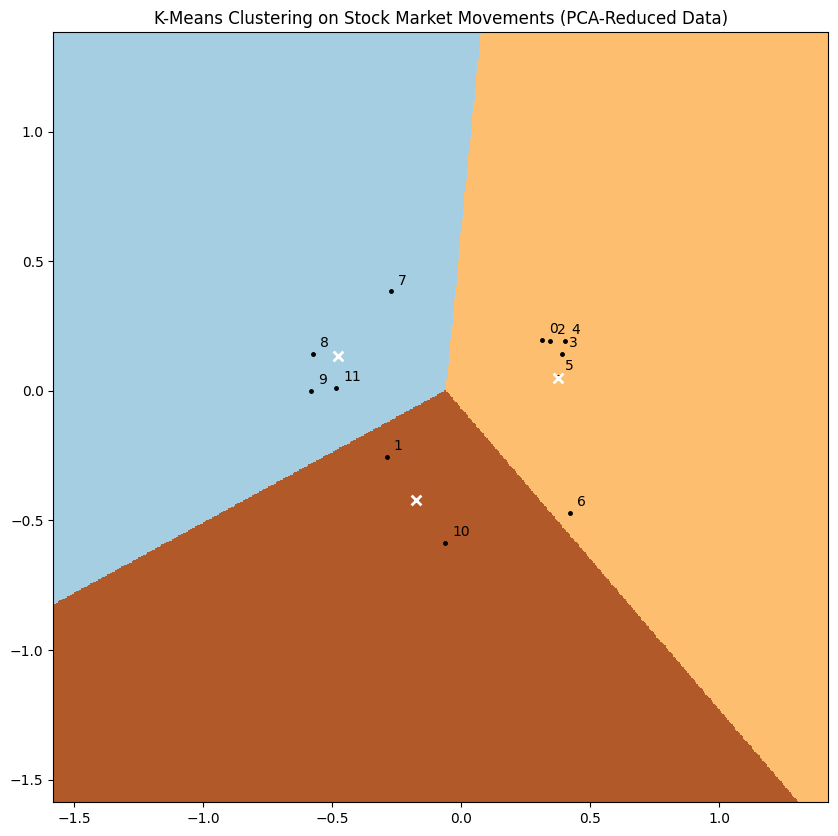

<Figure size 640x480 with 0 Axes>

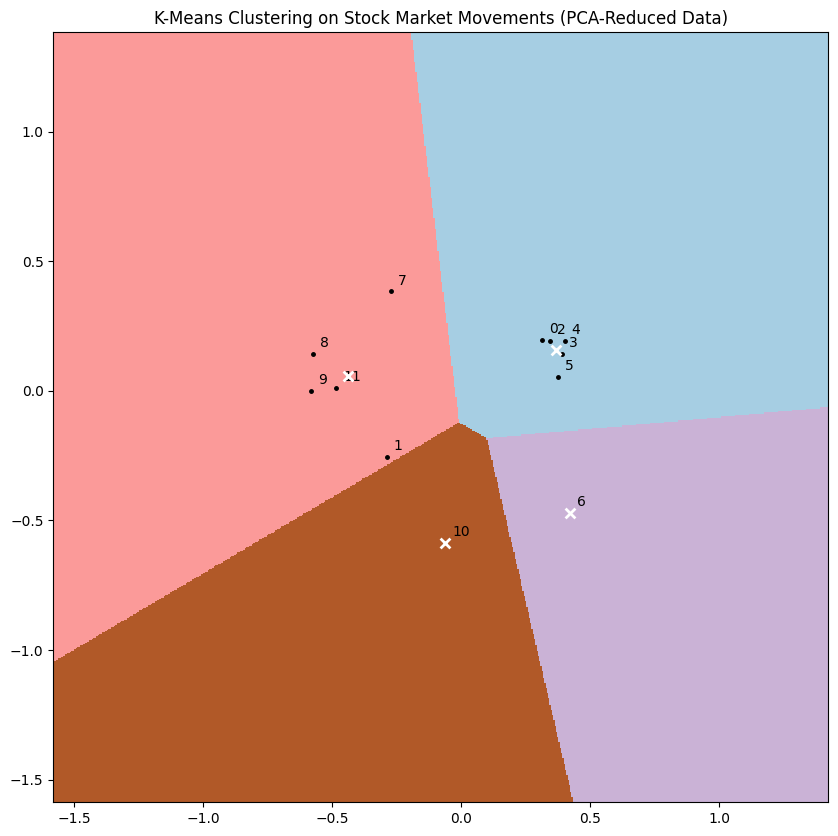

<Figure size 640x480 with 0 Axes>

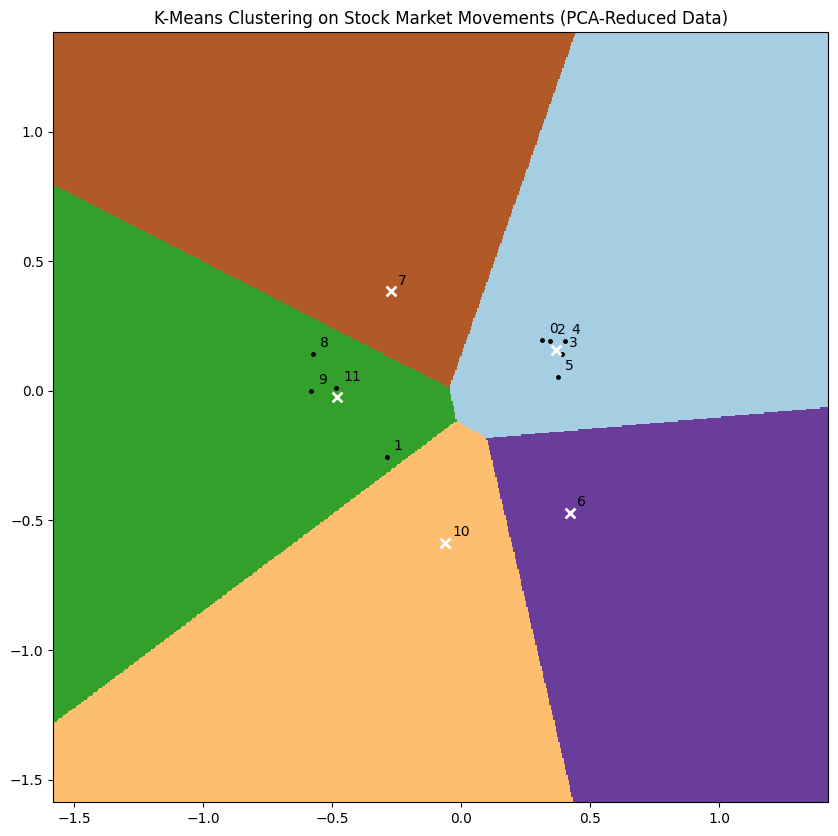

<Figure size 640x480 with 0 Axes>

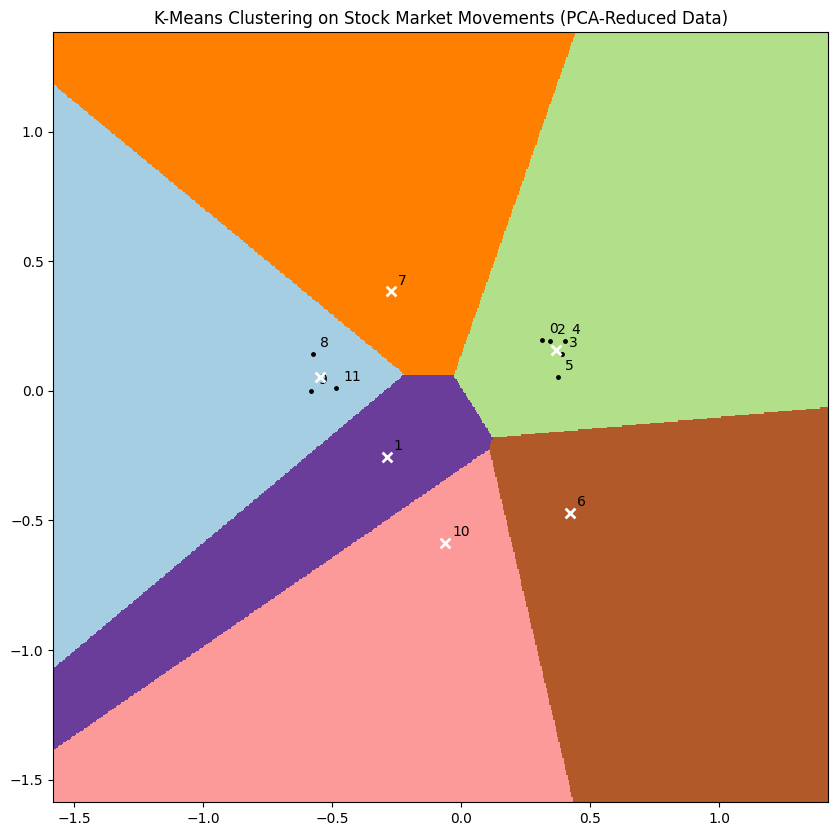

<Figure size 640x480 with 0 Axes>

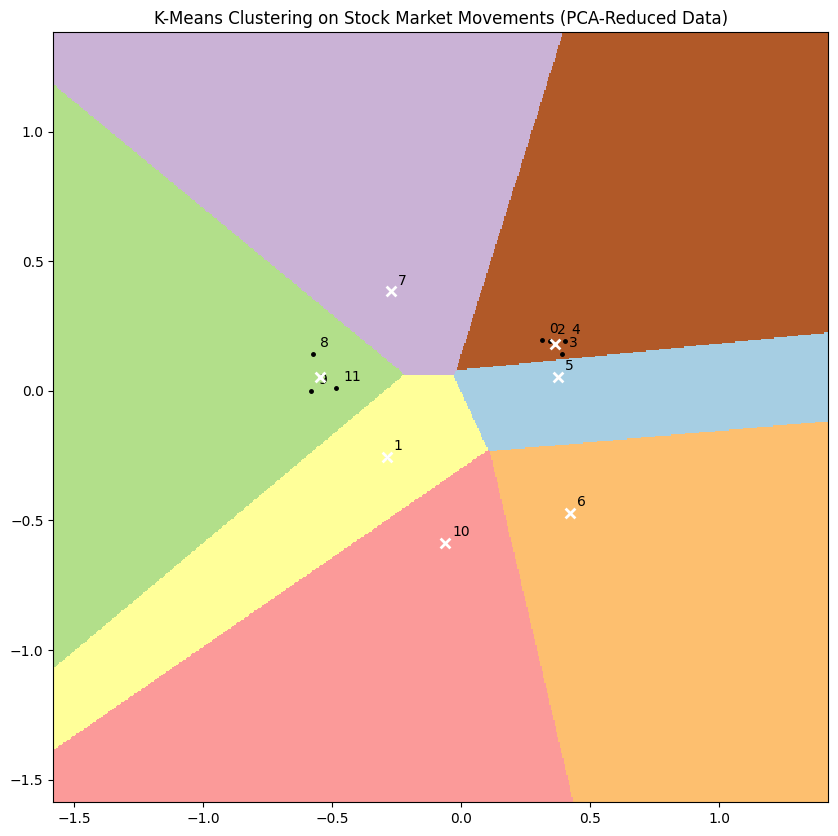

<Figure size 640x480 with 0 Axes>

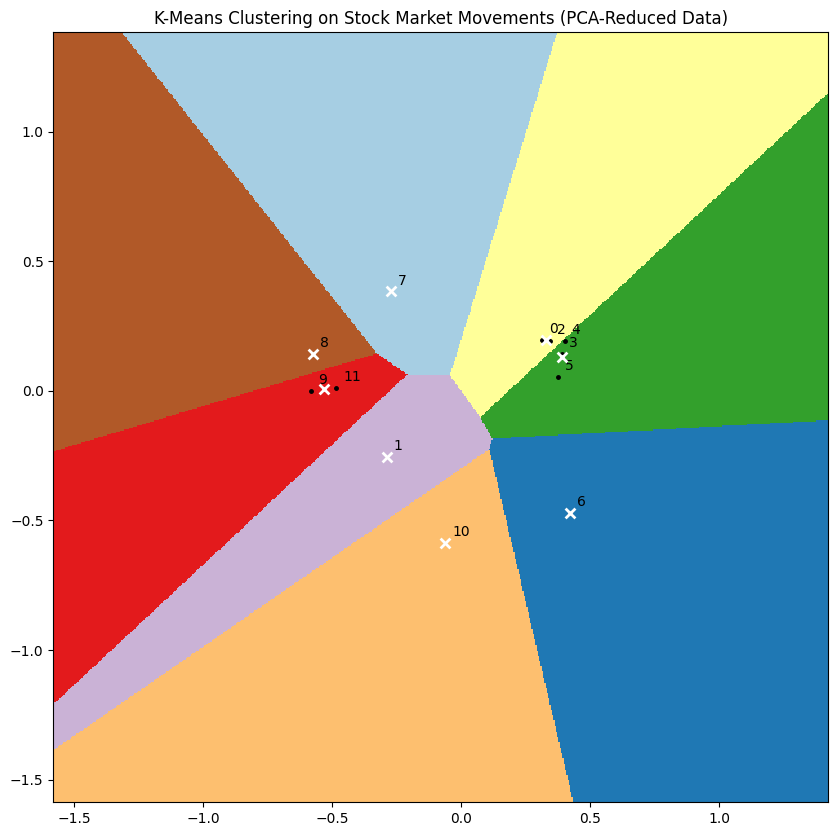

<Figure size 640x480 with 0 Axes>

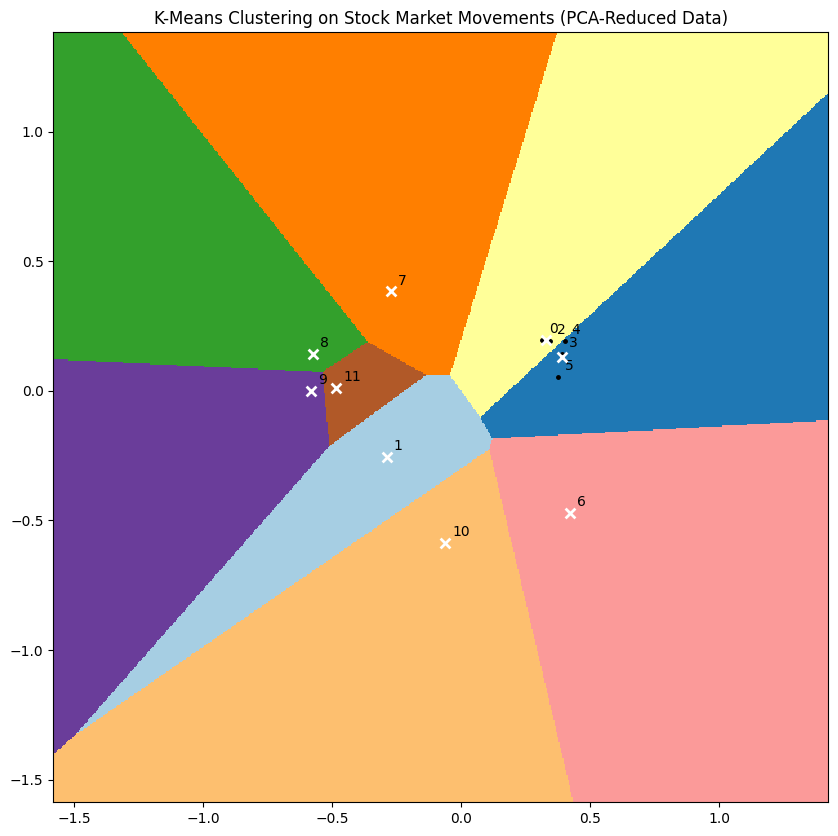

<Figure size 640x480 with 0 Axes>

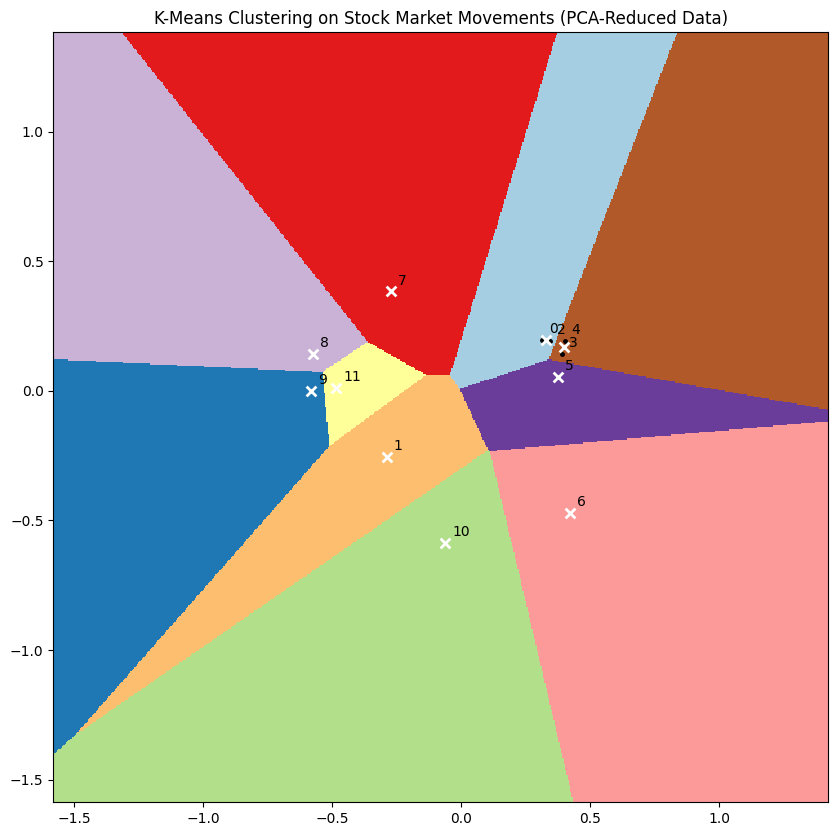

<Figure size 640x480 with 0 Axes>

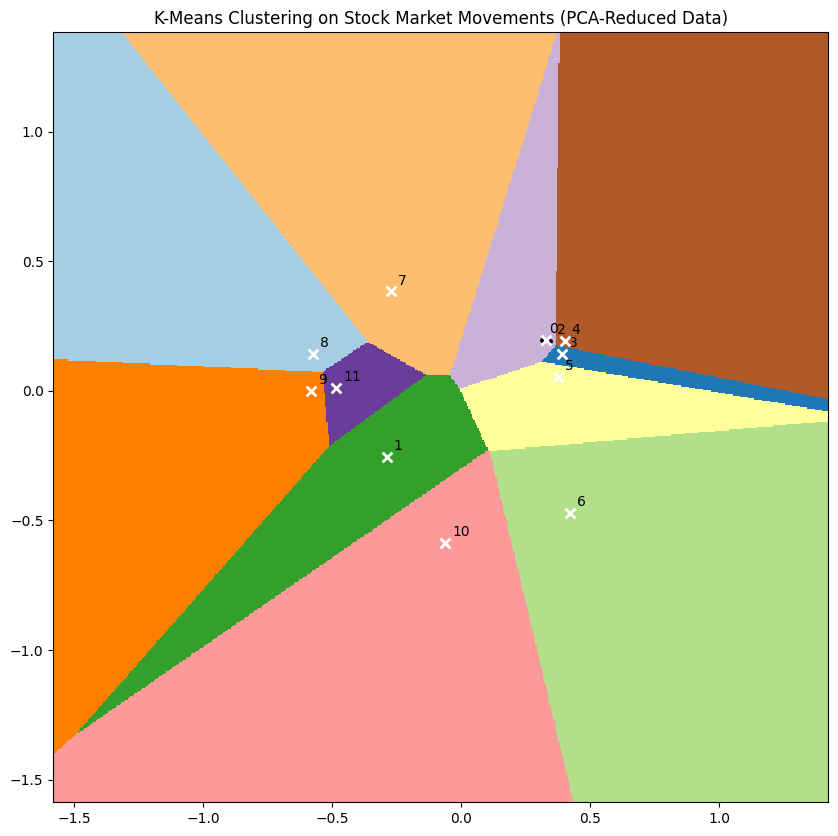

In [22]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

for i in range(1, 12):
    pca_plot(n_clusters=i, data=reduced_data, symbols=symbols)


# # run kmeans on reduced data
# kmeans = KMeans(n_clusters=7)
# kmeans.fit(reduced_data)
# labels = kmeans.predict(reduced_data)

# # create DataFrame aligning labels & companies
# df = pd.DataFrame({'labels': labels, 'companies': symbols})

# # Display df sorted by cluster labels
# print(df.sort_values('labels'))

In [23]:
stop

NameError: name 'stop' is not defined

<Figure size 640x480 with 0 Axes>

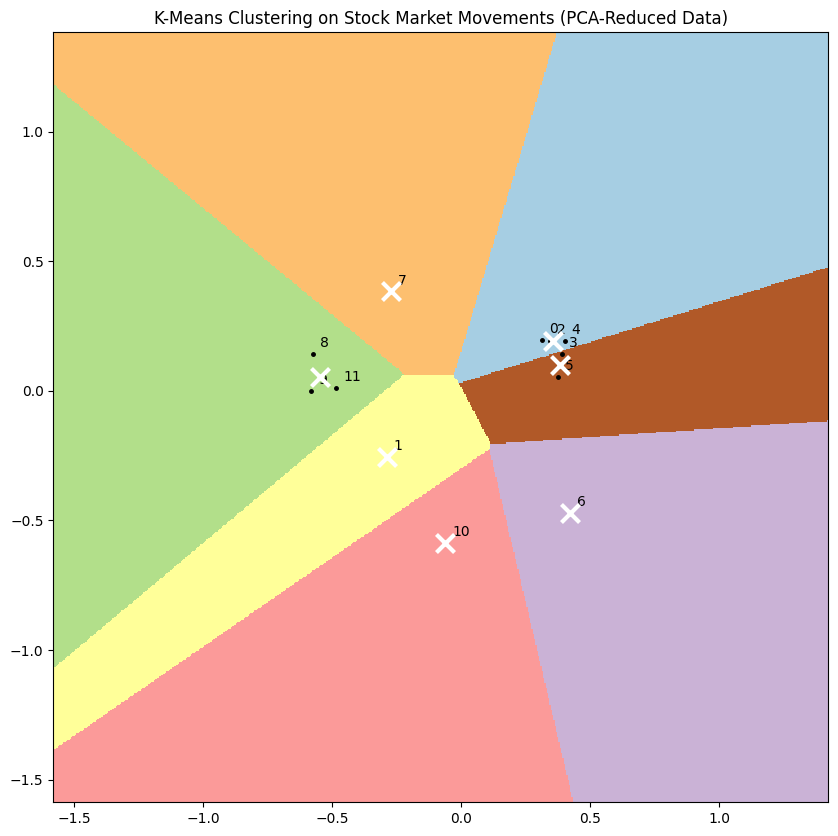

In [71]:
# Define step size of mesh
h = 0.005

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

# Add labels with offset
for i in range(len(reduced_data)):
    plt.annotate(str(i), 
                (reduced_data[i, 0], reduced_data[i, 1]),
                xytext=(5, 5),  # offset from the point
                textcoords='offset points')


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [38]:
df

,labels,companies
0,7,Apple
1,4,IBM
2,0,Microsoft
3,0,Google
4,0,Amazon
5,5,Tesla
6,6,Nvidia
7,1,Walmart
8,9,Johnson & Johnson
9,2,Verizon


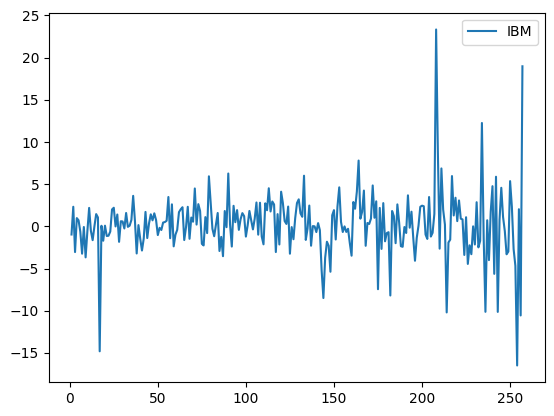

In [25]:
df['diff'] = df['IBM'] - df['IBM'].shift(1)
plt.plot(df.index, df['diff'], label='IBM')
plt.legend()
plt.show()


In [39]:
df[:-1]

,Apple,IBM,Microsoft,Google,Amazon,Tesla,Nvidia,Walmart,Johnson & Johnson,Verizon,AT&T,Pfizer,diff
0,168.7032,183.7776,421.3063,154.6809,180.76,173.5200,90.1210,59.3133,152.5846,39.5946,240.4874,26.0886,NaN
1,168.5539,182.8103,418.2991,154.3426,180.83,166.3900,89.2143,58.5025,152.5943,39.8849,236.5645,25.9474,-0.1493
2,169.3402,185.1319,419.1775,153.5862,183.34,169.9800,89.4672,58.8387,149.6201,40.1940,238.3584,25.6838,0.7863
3,168.5091,182.0849,415.7485,148.5307,180.33,171.8800,86.1822,58.9079,148.1282,39.7772,236.1702,25.1565,-0.8311
4,168.7181,183.0618,422.2889,151.6257,185.20,171.1900,88.0197,59.1848,147.5372,39.4448,237.7867,25.1283,0.2090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,207.9100,247.7000,370.6700,151.5700,184.00,260.1000,104.1500,83.5100,154.7500,44.7500,172.5000,24.4604,-15.4500
253,203.2500,243.0200,372.0061,150.8800,178.64,268.1000,102.4200,86.9137,159.4900,45.5500,169.9999,24.2901,-4.6600
254,186.5999,226.5300,359.7500,144.7900,170.20,235.2501,92.5999,83.0000,153.5392,43.0600,164.0000,22.9500,-16.6501
255,182.6100,228.5600,360.6650,148.8701,179.01,239.4850,99.1799,84.0000,152.0000,42.8600,163.4500,22.7400,-3.9899


In [44]:
df['diff'] = df['Apple'] - df['Apple'].shift(1)
df.tail(10)

,Apple,IBM,Microsoft,Google,Amazon,Tesla,Nvidia,Walmart,Johnson & Johnson,Verizon,AT&T,Pfizer,diff
247,221.5300,249.00,389.3100,165.0000,200.235,268.5000,112.2300,84.8900,161.7500,44.265,184.0500,25.2000,-2.7100
248,223.4600,245.69,389.8100,162.0000,200.989,272.8000,111.2650,85.5000,162.9000,44.970,183.9000,25.0595,1.9300
249,217.2200,242.70,377.7400,154.2900,192.650,260.1200,109.0101,85.0000,163.7000,45.005,178.4800,25.1253,-6.2400
250,221.1999,248.06,373.8000,153.8100,189.110,256.1000,107.5200,87.6500,161.8200,45.500,176.9700,25.2807,3.9799
251,223.3600,250.40,382.3900,157.6500,192.850,268.0800,110.0201,88.8300,153.3000,45.390,173.5000,24.6100,2.1601
252,207.9100,247.70,370.6700,151.5700,184.000,260.1000,104.1500,83.5100,154.7500,44.750,172.5000,24.4604,-15.4500
253,203.2500,243.02,372.0061,150.8800,178.640,268.1000,102.4200,86.9137,159.4900,45.550,169.9999,24.2901,-4.6600
254,186.5999,226.53,359.7500,144.7900,170.200,235.2501,92.5999,83.0000,153.5392,43.060,164.0000,22.9500,-16.6501
255,182.6100,228.56,360.6650,148.8701,179.010,239.4850,99.1799,84.0000,152.0000,42.860,163.4500,22.7400,-3.9899
256,169.4000,218.00,351.0000,143.2437,168.300,218.7900,93.3995,80.2588,148.0100,41.930,160.0000,21.6697,-13.2100


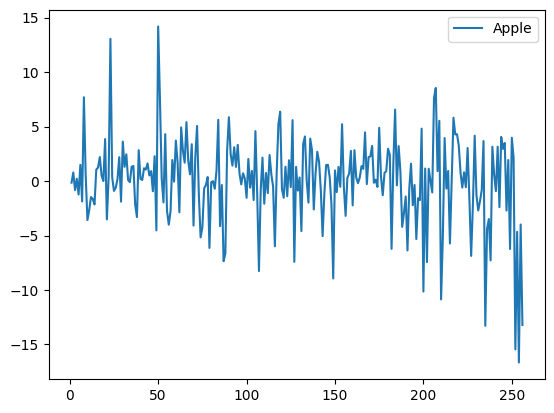

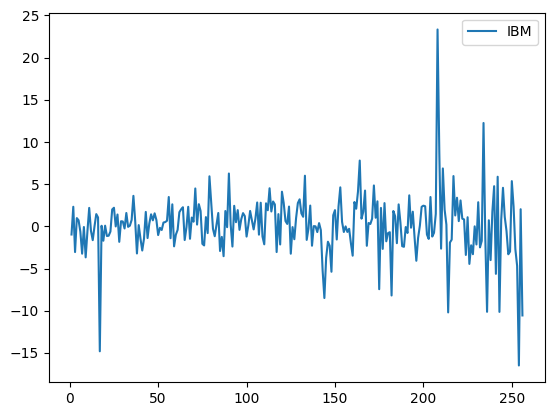

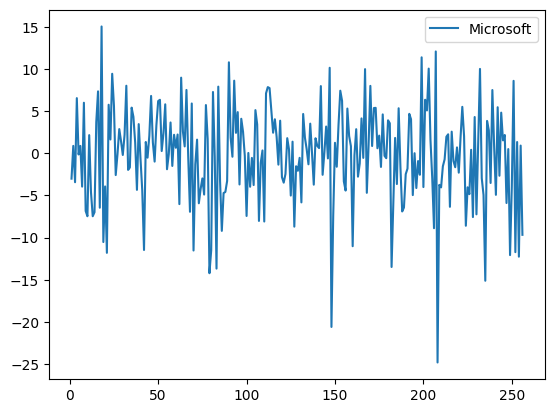

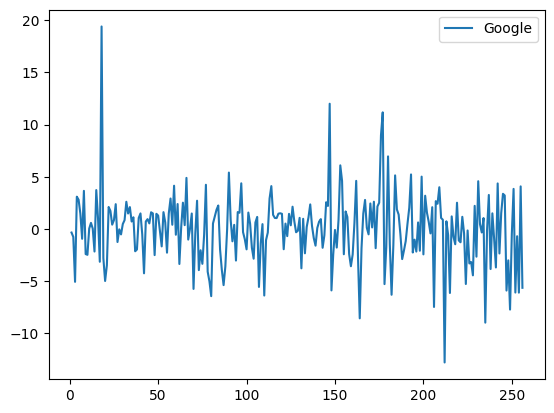

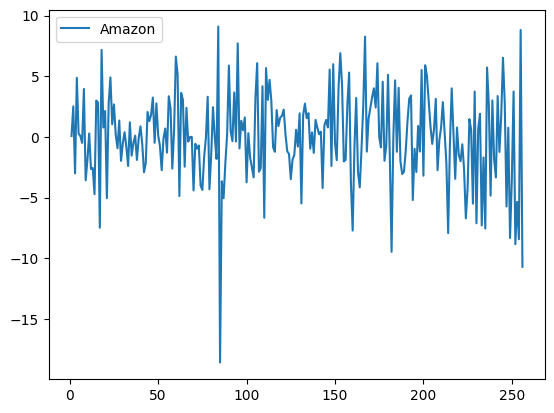

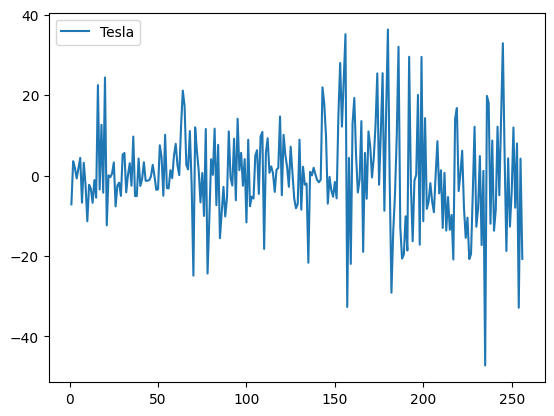

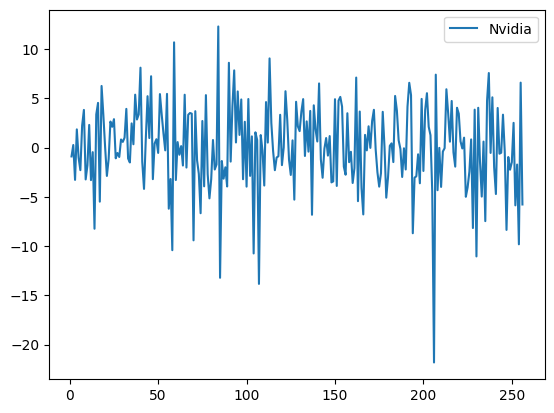

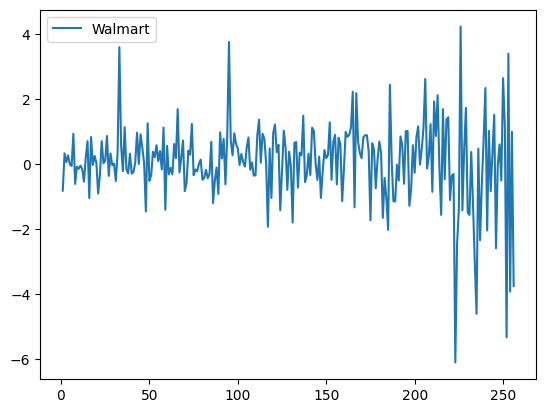

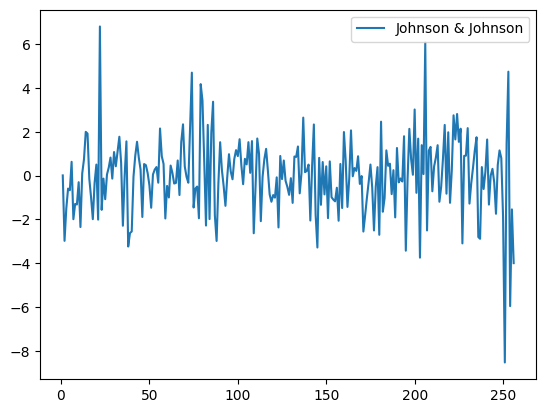

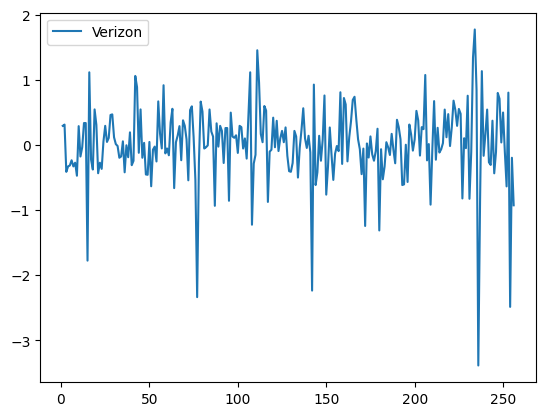

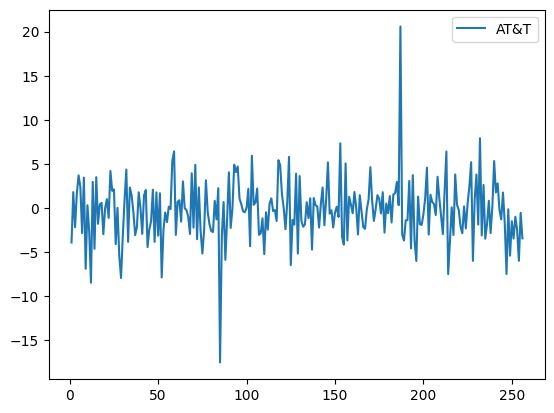

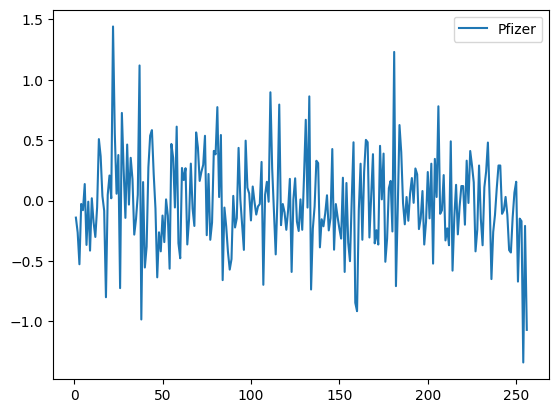

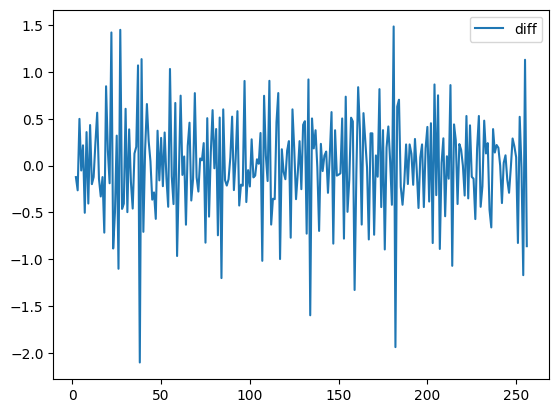

In [45]:
for col in df.columns:
    df['diff'] = df[col] - df[col].shift(1)
    plt.plot(df.index, df['diff'], label=col)
    plt.legend()
    plt.show()


In [ ]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())